In [1]:
"""
ver.02
* Add save morgen fingerprint similarity figure.
* Add a determination of whether chain density, thickness, and molLogP columns exist.
* Minor fixes.

"""

'\nver.02\n* Add save morgen fingerprint similarity figure.\n* Add a determination of whether chain density, thickness, and molLogP columns exist.\n* Minor fixes.\n\n'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#importing rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import PandasTools as PandasTools
from rdkit import DataStructs
from rdkit.ML.Descriptors import MoleculeDescriptors

%matplotlib inline

In [2]:
#file_name = input("Input the file name: ")
file_name = "250124_All"
data = pd.read_csv("240628_Proteins.csv")
data.head()

,ref,Sample,Type,Protein adsorption / ng cm-2,Protein MW / kDa,Protein Charge (pI),Thickness (nm),Smiles
0,https://pubs.acs.org/doi/full/10.1021/acs.jpcc...,PBMA,BSA,236.6,66.5,4.7,11.962000,C=C(C)C(=O)OCCCC
1,https://pubs.acs.org/doi/full/10.1021/acs.jpcc...,PHEMA,BSA,36.3,66.5,4.7,16.822000,C=C(C)C(=O)OCCO
2,https://pubs.acs.org/doi/full/10.1021/acs.jpcc...,PmOEGMA,BSA,16.9,66.5,4.7,17.900000,C=C(C)C(=O)OCCOCCOCCOCCOC
3,https://pubs.acs.org/doi/full/10.1021/acs.jpcc...,PMEA,BSA,4.8,66.5,4.7,19.788958,C=CC(=O)OCCOC
4,https://pubs.acs.org/doi/full/10.1021/acs.jpcc...,PAEMA,BSA,454.4,66.5,4.7,9.222500,C=C(C)C(=O)OCC[NH3+].[Cl-]


Tanimoto Similarity Coefficient of molecules_1 vs molecule_1: 1.0
Tanimoto Similarity Coefficient of molecules_1 vs molecule_2: 0.6153846153846154


C:\Users\shiws\AppData\Local\Temp\ipykernel_5180\3365856189.py:58: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figure.show()


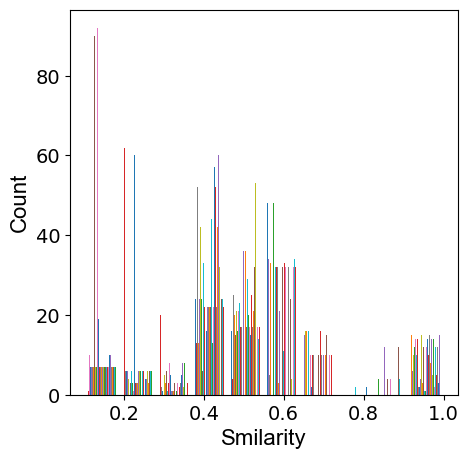

In [3]:
# Morgan fingerprint

morgans = []
no_error = []
morgan_keys = []

for idx, smile in enumerate(data["Smiles"]):
    mol = Chem.MolFromSmiles(smile)
    try:
        fp = AllChem.GetMorganFingerprint(mol, 2)
    except:
        continue
    no_error.append(idx)
    morgans.append(fp.GetNonzeroElements())
    
for morgan in morgans:
    morgan_keys += morgan.keys()
    morgan_keys = list(set(morgan_keys))
    
morgan_mat = np.zeros((len(morgans), len(morgan_keys)))
for idx1, morgan in enumerate(morgans):
    for k, v in morgan.items():
        morgan_mat[idx][morgan_keys.index(k)] = v
        
molecules = data.Smiles.apply(Chem.MolFromSmiles)

mols_fps = [AllChem.GetMorganFingerprintAsBitVect(x,2) for x in molecules]
print(f"Tanimoto Similarity Coefficient of molecules_1 vs molecule_1: {DataStructs.TanimotoSimilarity(mols_fps[0], mols_fps[0])}")
print(f"Tanimoto Similarity Coefficient of molecules_1 vs molecule_2: {DataStructs.TanimotoSimilarity(mols_fps[0], mols_fps[1])}")

sim_ref = DataStructs.BulkTanimotoSimilarity(mols_fps[0], mols_fps)

def pairwise_sim(mols):
    pairwise = []
    for i in mols:
        sim = DataStructs.BulkTanimotoSimilarity(i, mols)
        pairwise.append(sim)
    return pairwise

PW = pairwise_sim(mols_fps)

figure, (plt2) = plt.subplots(1,1)
figure.set_size_inches(5,5)
"""
plt1.hist(sim_ref)
plt1.set_title("Similarity to reference molecule",fontsize=22, font="Arial")
plt1.set_xlabel("Smilarity", fontsize=20, font="Arial")
plt1.set_ylabel("Count", fontsize=20, font="Arial")
plt1.tick_params(axis='both', which='major', labelsize=14)
"""
plt2.hist(PW)
#plt2.set_title("Pairwise similarity all molecules",fontsize=24, font="Arial")
plt2.set_xlabel("Smilarity", fontsize=16, font="Arial")
plt2.set_ylabel("Count", fontsize=16, font="Arial")
plt2.tick_params(axis='both', which='major', labelsize=14)
figure.savefig(file_name+"_Similarity.png", bbox_inches="tight")
figure.set_size_inches(5,5)
figure.show()
#figure.clf()

In [4]:
def concatenate(column, data_list):
    data_list = pd.concat([column, data_list], axis = 1)
    return data_list

In [5]:
data

,ref,Sample,Type,Protein adsorption / ng cm-2,Protein MW / kDa,Protein Charge (pI),Thickness (nm),Smiles
0,https://pubs.acs.org/doi/full/10.1021/acs.jpcc...,PBMA,BSA,236.6,66.5,4.7,11.962000,C=C(C)C(=O)OCCCC
1,https://pubs.acs.org/doi/full/10.1021/acs.jpcc...,PHEMA,BSA,36.3,66.5,4.7,16.822000,C=C(C)C(=O)OCCO
2,https://pubs.acs.org/doi/full/10.1021/acs.jpcc...,PmOEGMA,BSA,16.9,66.5,4.7,17.900000,C=C(C)C(=O)OCCOCCOCCOCCOC
3,https://pubs.acs.org/doi/full/10.1021/acs.jpcc...,PMEA,BSA,4.8,66.5,4.7,19.788958,C=CC(=O)OCCOC
4,https://pubs.acs.org/doi/full/10.1021/acs.jpcc...,PAEMA,BSA,454.4,66.5,4.7,9.222500,C=C(C)C(=O)OCC[NH3+].[Cl-]
...,...,...,...,...,...,...,...,...
101,Nagasawa,PMPC,Fib,0.0,340.0,5.8,12.490000,C=C(C)C(=O)OCCOP(=O)([O-])OCC[N+](C)(C)C
102,Nagasawa,PMPS,Fib,254.0,340.0,5.8,18.930000,C=C(C)C(=O)OCCCS(=O)(=O)[O-].[K+]
103,https://pubs.acs.org/doi/full/10.1021/acs.anal...,PHEMA,Fib,567.2,340.0,5.8,22.400000,C=C(C)C(=O)OCCO
104,https://pubs.acs.org/doi/full/10.1021/acs.anal...,PHEMA,Fib,125.1,340.0,5.8,40.100000,C=C(C)C(=O)OCCO


In [6]:
smiles = data.iloc[:, 7]
smiles

0                              C=C(C)C(=O)OCCCC
1                               C=C(C)C(=O)OCCO
2                     C=C(C)C(=O)OCCOCCOCCOCCOC
3                                 C=CC(=O)OCCOC
4                    C=C(C)C(=O)OCC[NH3+].[Cl-]
                         ...                   
101    C=C(C)C(=O)OCCOP(=O)([O-])OCC[N+](C)(C)C
102           C=C(C)C(=O)OCCCS(=O)(=O)[O-].[K+]
103                             C=C(C)C(=O)OCCO
104                             C=C(C)C(=O)OCCO
105                     C=C(C)C(=O)OCCN1CCCC1=O
Name: Smiles, Length: 106, dtype: object

In [7]:
smiles = data.iloc[:, 7]
#ca = data.iloc[:, 3]

descriptor_names = []
descriptors = []

for descriptor_info in Descriptors.descList:
    descriptor_names.append(descriptor_info[0])
print("Number of descriptors: ", len(descriptor_names))

descriptor_calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

for index, smiles_i in enumerate(smiles):
    print(index+1, "/", len(smiles))
    molecule = Chem.MolFromSmiles(smiles_i)
    descriptors.append(descriptor_calculator.CalcDescriptors(molecule))
    
descriptors_with_y = pd.DataFrame(descriptors, index=data.index, columns=descriptor_names)

if "Protein adsorption / ng cm-2" in data:
    adsorption = data["Protein adsorption / ng cm-2"]
    descriptors_with_y = concatenate(adsorption, descriptors_with_y)
if "Thickness (nm)" in data:
    thickness = data["Thickness (nm)"]
    descriptors_with_y = concatenate(thickness, descriptors_with_y)
if "Chain density (chains nm-2)" in data:
    chain = data["Chain density (chains nm-2)"]
    descriptors_with_y = concatenate(chain, descriptors_with_y)
if "Graft density (chains nm-2)" in data:
    graft = data["Graft density (chains nm-2)"]
    descriptors_with_y = concatenate(graft, descriptors_with_y)

#if "MolLogP" in data:
#    logP = data["MolLogP"]
#    descriptors_with_y = concatenate(logP, descriptors_with_y)

#descriptors_with_y = concatenate(data["Contact angle (deg)"], descriptors_with_y)

descriptors_with_y.to_csv(file_name+"_descriptors.csv")


Number of descriptors:  210
1 / 106
2 / 106
3 / 106
4 / 106
5 / 106
6 / 106
7 / 106
8 / 106
9 / 106
10 / 106
11 / 106
12 / 106
13 / 106
14 / 106
15 / 106
16 / 106
17 / 106
18 / 106
19 / 106
20 / 106
21 / 106
22 / 106
23 / 106
24 / 106
25 / 106
26 / 106
27 / 106
28 / 106
29 / 106
30 / 106
31 / 106
32 / 106
33 / 106
34 / 106
35 / 106
36 / 106
37 / 106
38 / 106
39 / 106
40 / 106
41 / 106
42 / 106
43 / 106
44 / 106
45 / 106
46 / 106
47 / 106
48 / 106
49 / 106
50 / 106
51 / 106
52 / 106
53 / 106
54 / 106
55 / 106
56 / 106
57 / 106
58 / 106
59 / 106
60 / 106
61 / 106
62 / 106
63 / 106
64 / 106
65 / 106
66 / 106
67 / 106
68 / 106
69 / 106
70 / 106
71 / 106
72 / 106
73 / 106
74 / 106
75 / 106
76 / 106
77 / 106
78 / 106
79 / 106
80 / 106
81 / 106
82 / 106
83 / 106
84 / 106
85 / 106
86 / 106
87 / 106
88 / 106
89 / 106
90 / 106
91 / 106
92 / 106
93 / 106
94 / 106
95 / 106
96 / 106
97 / 106
98 / 106
99 / 106
100 / 106
101 / 106
102 / 106
103 / 106
104 / 106
105 / 106
106 / 106
